# Deep Learning with Python
Performing Deep Learning on the Bike Sharing Dataset

## Initializations

### Defining CONSTANTS

In [11]:
BATCH_SIZE = 32

# Here the test split is 10% of the data, and the validation split is 10% of the remaining training data
TEST_SPLIT = 0.1
VAL_SPLIT = 0.20

#### Importing required Libraries

In [12]:
# supporting libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import datetime

In [13]:
# deep learning libraries and modules
import tensorflow as tf

# Data Loading, Cleaning, and Preparation


In [17]:
import os
os.getcwd()

'C:\\Users\\sgoswam'

In [16]:
df = pd.read_csv(
    "data/SeoulBikeData.csv",
    encoding_errors='ignore',
    header = 0,
    names = [
        'Date', 'RentedBikeCount', 'Hour', 'Temperature', 'Humidity',
        'Windspeed', 'Visibility', 'DewPointTemperature', 'SolarRadiation',
        'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'FunctionalDay'
    ],
    dtype={
        'Date': 'str',
        'RentedBikeCount': 'int',
        'Hour': 'int',
        'Temperature': 'float',
        'Humidity': 'int',
        'Windspeed': 'float',
        'Visibility': 'int',
        'DewPointTemperature': 'float',
        'SolarRadiation': 'float',
        'Rainfall': 'float',
        'Snowfall': 'float',
        'Seasons': 'str',
        'Holiday': 'str',
        'FunctionalDay': 'str'
    }
)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/SeoulBikeData.csv'

In [ ]:
# Checking for null values
print("Null Value columns in the dataset: ")
df.isnull().sum()

Null Value columns in the dataset: 


Date                   0
RentedBikeCount        0
Hour                   0
Temperature            0
Humidity               0
Windspeed              0
Visibility             0
DewPointTemperature    0
SolarRadiation         0
Rainfall               0
Snowfall               0
Seasons                0
Holiday                0
FunctionalDay          0
dtype: int64

No null values were observed in the datset.

In [ ]:
# Converting the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')

# Converting the Holiday, and FunctionalDay columns to boolean
df['Holiday'] = df['Holiday'].apply(lambda x: 1 if x == 'Holiday' else 0)
df['FunctionalDay'] = df['FunctionalDay'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
df['DayMonth'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month_name()
# df['Year'] = df['Date'].dt.year       # Not using year as a feature, since we don't have enough data for multiple years
df['DayWeek'] = df['Date'].dt.day_name()
df['DayYear'] = df['Date'].dt.dayofyear

In [ ]:
df.head()

,Date,RentedBikeCount,Hour,Temperature,Humidity,Windspeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Seasons,Holiday,FunctionalDay,DayMonth,Month,DayWeek,DayYear
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,1,December,Friday,335
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,1,December,Friday,335
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,1,December,Friday,335
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,1,December,Friday,335
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,1,December,Friday,335


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 8760 non-null   datetime64[ns]
 1   RentedBikeCount      8760 non-null   int32         
 2   Hour                 8760 non-null   int32         
 3   Temperature          8760 non-null   float64       
 4   Humidity             8760 non-null   int32         
 5   Windspeed            8760 non-null   float64       
 6   Visibility           8760 non-null   int32         
 7   DewPointTemperature  8760 non-null   float64       
 8   SolarRadiation       8760 non-null   float64       
 9   Rainfall             8760 non-null   float64       
 10  Snowfall             8760 non-null   float64       
 11  Seasons              8760 non-null   object        
 12  Holiday              8760 non-null   int64         
 13  FunctionalDay        8760 non-nul

In [ ]:
df.describe()

,RentedBikeCount,Hour,Temperature,Humidity,Windspeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Holiday,FunctionalDay,DayMonth,DayYear
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,0.049315,0.966324,15.720548,183.000000
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,0.216537,0.180404,8.796749,105.372043
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,0.000000,1.000000,8.000000,92.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,0.000000,1.000000,16.000000,183.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,0.000000,1.000000,23.000000,274.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,1.000000,1.000000,31.000000,365.000000


### Preprocessing the data
Change this list to assign the column encoding type.

In [ ]:
# Creating a list of features to be used in the model
target = ['RentedBikeCount']
binary_features = ['Holiday', 'FunctionalDay']
numeric_features = ['Temperature', 'Humidity', 'Windspeed', 'Visibility', 'DewPointTemperature', 'SolarRadiation', 'Rainfall', 'Snowfall', 'DayMonth', 'DayYear']
categorical_features = ['Hour', 'Seasons', 'Month', 'DayWeek']
features = binary_features + numeric_features + categorical_features

In [10]:
df[numeric_features].standardize()

NameError: name 'df' is not defined

# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [12]:
inputs = {}
for name, columnm in df.items():
    if name in binary_features:
        dtype = tf.dtypes.string
    elif name in categorical_features:
        dtype = tf.dtypes.string
    elif name in numeric_features:
        dtype = tf.dtypes.float32
    else:
        continue
    inputs[name] = tf.keras.Input(shape=(), name=name, dtype=dtype)

inputs

{'Hour': <KerasTensor: shape=(None,) dtype=string (created by layer 'Hour')>,
 'Temperature': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'Temperature')>,
 'Humidity': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'Humidity')>,
 'Windspeed': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'Windspeed')>,
 'Visibility': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'Visibility')>,
 'DewPointTemperature': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'DewPointTemperature')>,
 'SolarRadiation': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'SolarRadiation')>,
 'Rainfall': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'Rainfall')>,
 'Snowfall': <KerasTensor: shape=(None,) dtype=float32 (created by layer 'Snowfall')>,
 'Seasons': <KerasTensor: shape=(None,) dtype=string (created by layer 'Seasons')>,
 'Holiday': <KerasTensor: shape=(None,) dtype=string (created by layer 'Holiday')>,
 'Functional

### Defining the Preprocessing Pipeline

In [13]:
# Binary features
preprocessed = []

for name in binary_features:
    inp = inputs[name]
    inp = inp[:, tf.newaxis]
    float_value = tf.cast(inp, tf.float32)
    preprocessed.append(float_value)

preprocessed

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_1')>]

In [14]:
# Numeric features
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(df[numeric_features].to_numpy(dtype=np.float32))

def stack_dict(inputs, fun=tf.stack):
    values = []
    for key in sorted(inputs.keys()):
        values.append(tf.cast(inputs[key], tf.float32))
    return fun(values, axis=-1)


numeric_inputs = {}
for name in numeric_features:
    numeric_inputs[name]=inputs[name]

numeric_inputs = stack_dict(numeric_inputs)
numeric_normalized = normalizer(numeric_inputs)

preprocessed.append(numeric_normalized)

preprocessed

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_1')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'normalization')>]

In [15]:
# Categorical features

for name in categorical_features:
    vocab = sorted(set(df[name]))
    print(f'name: {name}')
    print(f'vocab: {vocab}\n')

    if type(vocab[0]) is str:
        lookup = tf.keras.layers.StringLookup(vocabulary=vocab, output_mode='one_hot')
    else:
        lookup = tf.keras.layers.IntegerLookup(vocabulary=vocab, output_mode='one_hot')

    x = inputs[name][:, tf.newaxis]
    x = lookup(x)
    preprocessed.append(x)


name: Hour
vocab: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

name: Seasons
vocab: ['Autumn', 'Spring', 'Summer', 'Winter']

name: Month
vocab: ['April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September']

name: DayWeek
vocab: ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']



In [16]:
preprocessed

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'tf.cast_1')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'normalization')>,
 <KerasTensor: shape=(None, 25) dtype=float32 (created by layer 'integer_lookup')>,
 <KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'string_lookup')>,
 <KerasTensor: shape=(None, 13) dtype=float32 (created by layer 'string_lookup_1')>,
 <KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'string_lookup_2')>]

In [17]:
preprocessed_result = tf.concat(preprocessed, axis=-1)
preprocessed_result

<KerasTensor: shape=(None, 63) dtype=float32 (created by layer 'tf.concat')>

### Splitting the dataset into train, validation, and test sets

In [18]:
train_df, test_df = train_test_split(
    df[features + target], test_size=TEST_SPLIT, random_state=42, shuffle=True
)
train_df, val_df = train_test_split(
    train_df, test_size=VAL_SPLIT, random_state=42, shuffle=True
)
len(train_df), len(val_df), len(test_df)

(6307, 1577, 876)

# Assembling the model

In [19]:
preprocessing_layers = tf.keras.Model(inputs, preprocessed_result)

In [20]:
train_ds = tf.data.Dataset.from_tensor_slices(
    train_df.to_dict(orient='list')
)

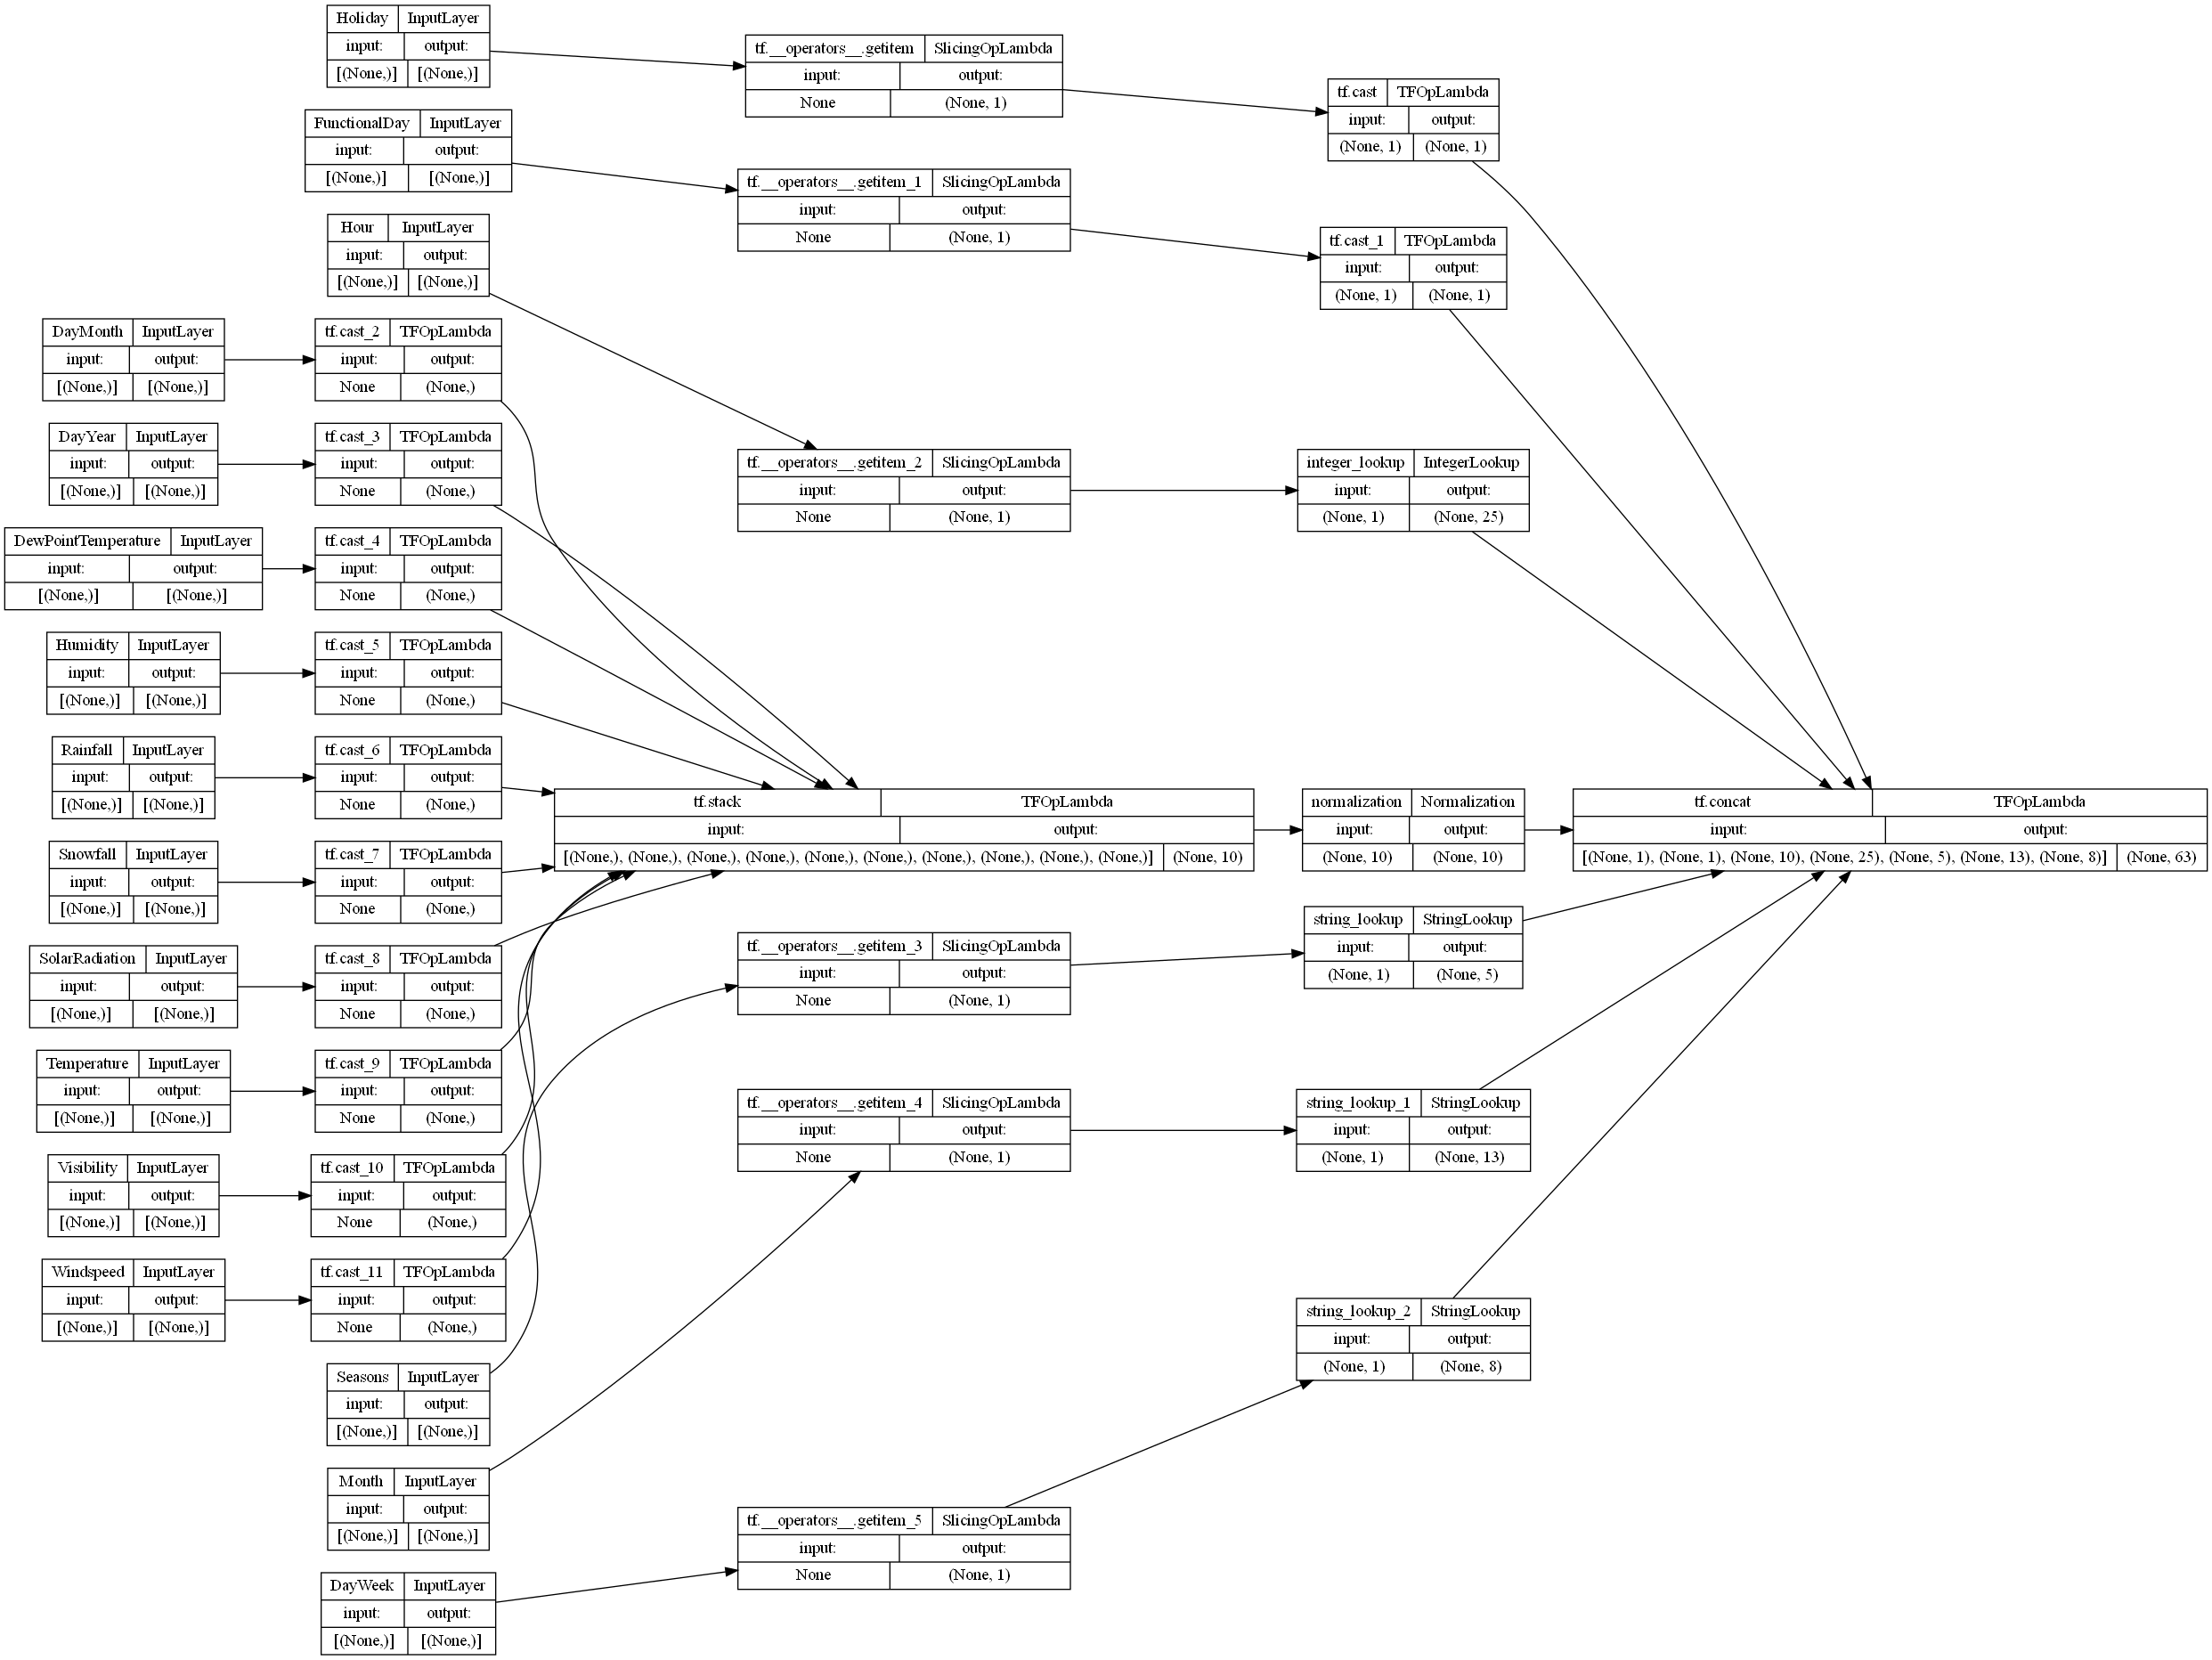

In [21]:
tf.keras.utils.plot_model(
    preprocessing_layers,
    rankdir="LR",
    show_shapes=True,
)

In [22]:
# Testing the preprocessor for a single sample
preprocessing_layers(dict(df[features].sample(1)))

<tf.Tensor: shape=(1, 63), dtype=float32, numpy=
array([[  0.        ,   1.        ,   1.0144784 ,   5.7842093 ,
         12.617815  ,  -2.304633  ,  -0.31193927,  -0.6551316 ,
          2.270408  ,  73.788315  , 109.851326  ,  -1.7197201 ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   1.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   1.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   1.        ,   0.        ,   0. 

In [23]:
train_layers = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [24]:
x = preprocessing_layers(inputs)
result = train_layers(x)
result

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'sequential')>

In [25]:
model = tf.keras.Model(inputs, result)

model.compile(
    optimizer   = 'adam',
    loss        = tf.keras.losses.MeanSquaredError(),
    metrics     = [tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.RootMeanSquaredError()]
)

In [26]:
import datetime

In [27]:
datetime.datetime.now().strftime('%Y%m%d-%H%M%S')

'20221127-123651'

# Training the model

In [29]:
history = model.fit(
    dict(train_df[features]),
    dict(train_df[target]),
    target,
    epochs=5
)

TypeError: fit() got multiple values for argument 'batch_size'

In [ ]:
model.save(os.path.join('logs', f'model_{datetime.datetime.now().strftime("%Y%m%d-%H%M%S")}.h5'))